# Practicing Logistic Regression

### Import Modules

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import jaccard_score as jss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Dataset

In [3]:
df = pd.read_csv(r'C:\Users\jamor\Data Science Project\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Cleaning & Manipulation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df_filter = df[['gender','Partner', 'Dependents', 'tenure',
                'PaymentMethod', 'MonthlyCharges', 'Churn']]

In [8]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7043 non-null   object 
 1   Partner         7043 non-null   object 
 2   Dependents      7043 non-null   object 
 3   tenure          7043 non-null   int64  
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


### Data Preprocessing

In [23]:
X = df_filter.drop('Churn', axis=1)
y = np.array(df_filter['Churn'])

In [27]:
le = LabelEncoder()
X.iloc[:, 0] = le.fit_transform(X.iloc[:, 0])
X.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])
X.iloc[:, 2] = le.fit_transform(X.iloc[:, 2])
X.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])
y = np.array(le.fit_transform(y)).reshape(-1,1)

In [29]:
sc = StandardScaler()
X_standard = sc.fit_transform(X)
y_standard = sc.fit_transform(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state=42)

### Training & Testing Dataset

In [31]:
lr = LogisticRegression(C = 0.1, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [32]:
y_pred = lr.predict(X_test)

### Model Evaluation

In [35]:
jaccard = jss(y_test, y_pred).round(2)
print(f'Jaccard Index : {jaccard}')

Jaccard Index : 0.37


In [36]:
precision = precision_score(y_test, y_pred).round(2)
print(f'Precision Score : {precision}')

Precision Score : 0.66


In [37]:
logloss = log_loss(y_test, y_pred).round(2)
print(f'Log Loss : {logloss}')

Log Loss : 7.31


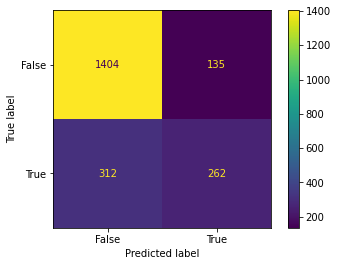

In [39]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix, display_labels = [False,
                                                      True])
cm_display.plot()
plt.show()

In [40]:
classreport = classification_report(y_test, y_pred)
print(classreport)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.46      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.77      2113

